
![Image of Yaktocat](https://github.com/jesugome/InfluencersInSocialNetworks/raw/master/logoAnalytics.png)


# Birds

![Image of Yaktocat](http://tremendouswallpapers.com/wp-content/uploads/2014/12/Venette-Waste_Trend-F-W-14-15_Neat-Graphics_mandarin-duck.jpg)
    
 ## Machine Learning Project

Developed by [Jesus Solano](http://www.jesussolano.com/) -- [Sergio Castelblanco](http://www.jesussolano.com/) -- [Jose Sandoval](http://www.jesussolano.com/) -- [Aleksey Sepulveda](http://www.jesussolano.com/)


version 9.1, July 15 2018

## Load Datasets

In [1]:
# Download datasets.

import os.path
import numpy as np

# If datasets already exist do nothing. 

if not os.path.exists('birds.zip'):
  ! wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds.zip
    
if not os.path.exists('birds_f_numbers.txt'):
  ! wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds_f_numbers.txt
    
if not os.path.exists('birds_training_pairs.txt'):
  ! wget http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds_training_pairs.txt


--2018-07-16 03:51:50--  http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds.zip
Resolving www-cvr.ai.uiuc.edu (www-cvr.ai.uiuc.edu)... 128.174.227.253
Connecting to www-cvr.ai.uiuc.edu (www-cvr.ai.uiuc.edu)|128.174.227.253|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43988823 (42M) [application/zip]
Saving to: ‘birds.zip’

birds.zip           100%[===================>]  41.95M  45.5MB/s    in 0.9s    

2018-07-16 03:51:51 (45.5 MB/s) - ‘birds.zip’ saved [43988823/43988823]

--2018-07-16 03:51:52--  http://www-cvr.ai.uiuc.edu/ponce_grp/data/birds/birds_f_numbers.txt
Resolving www-cvr.ai.uiuc.edu (www-cvr.ai.uiuc.edu)... 128.174.227.253
Connecting to www-cvr.ai.uiuc.edu (www-cvr.ai.uiuc.edu)|128.174.227.253|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4656 (4.5K) [text/plain]
Saving to: ‘birds_f_numbers.txt’

birds_f_numbers.txt 100%[===================>]   4.55K  --.-KB/s    in 0s      

2018-07-16 03:51:52 (309 MB/s) - ‘birds_f

In [0]:
import os 
import zipfile

# Extract images zip file
with zipfile.ZipFile("birds.zip","r") as zip_ref:
    zip_ref.extractall(os.getcwd())

Using TensorFlow backend.


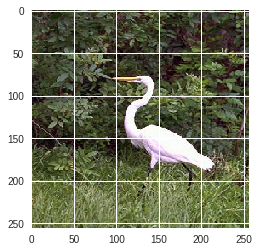

In [3]:
# Shows an image example of training set.
%matplotlib inline

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('birds/egret/egr013.jpg',grayscale=False,target_size=(256,256),interpolation='nearest') 
x= img_to_array(img)
plt.imshow(x/255)


In [0]:
# Create a random sorted list to split set of images in train and test.
import random

randomList= random.sample(range(1,101),100)

formating = "{:03d}".format

formatedList = [formating(item) for item in randomList]

In [0]:
from PIL import Image

# The target size is set due to Xception neural networks requisities. 

xsize = 299
ysize = 299

paths=['egret','mandarin','owl','puffin','toucan','wood_duck']

maxImage= 80

pre=''
birdKind=-1

xL=[]
yL=[]


# For to read, resize and split data into train and test.
for j in paths[:]:
    if(j=='egret'):
        pre='/egr'
        birdKind=0
    elif(j=='mandarin'):
        pre='/man'
        birdKind=1
    elif(j=='owl'):
        pre='/owl'
        birdKind=2
    elif(j=='puffin'):
        pre='/puf'
        birdKind=3
    elif(j=='toucan'):
        pre='/tou'
        birdKind=4
    elif(j=='wood_duck'):
        pre='/wod'
        birdKind=5

        
    counter=0
    for i in formatedList[:]:
        
        # Resize images to 224X224
        
        img = Image.open('birds/'+j+pre+i+'.jpg')
        wpercent = (xsize/float(img.size[0]))
        img = img.resize((xsize,ysize), Image.ANTIALIAS)
        img.save('birds/'+j+pre+i+'.jpg')
        
        # Load resized image to save into train or test array.
        img = load_img('birds/'+j+pre+i+'.jpg',grayscale=False,target_size=(xsize,ysize),interpolation='nearest') 
        x= img_to_array(img)
        
        xL.append(x)
        yL.append(birdKind)
          
        counter=counter+1
        

In [0]:
# Convert lists to arrays.
from sklearn.model_selection import train_test_split

xList=np.asarray(xL)
yList=np.asarray(yL)

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# Encode class values as integers.
encoder = LabelEncoder()
encoder.fit(yList)
encoded_Y = encoder.transform(yList)
# Convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_Y)

xTrain,xTest,yTrain,yTest = train_test_split(xList, y, test_size=0.3, random_state=22)

In [8]:
# Delete pre existing files.
! rm -r datasets/
yTrain

rm: cannot remove 'datasets/': No such file or directory


array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# Copy the images to folder(Not need but useful if we change the train generator)
from shutil import copy
counter = 0

if not os.path.exists('datasets/train/'):
  os.makedirs('datasets/train/egr')
  os.makedirs('datasets/train/man')
  os.makedirs('datasets/train/tou')
  os.makedirs('datasets/train/owl')
  os.makedirs('datasets/train/puf')
  os.makedirs('datasets/train/wod')
  
if not os.path.exists('datasets/test/'):
  os.makedirs('datasets/test/egr')
  os.makedirs('datasets/test/man')
  os.makedirs('datasets/test/tou')
  os.makedirs('datasets/test/owl')
  os.makedirs('datasets/test/puf')
  os.makedirs('datasets/test/wod')
    
for i in formatedList[:]:
  if counter < maxImage:
    copy('birds/egret/egr'+i+'.jpg','datasets/train/egr/egr'+i+'.jpg')
    copy('birds/mandarin/man'+i+'.jpg','datasets/train/man/man'+i+'.jpg')
    copy('birds/toucan/tou'+i+'.jpg','datasets/train/tou/tou'+i+'.jpg')
    copy('birds/owl/owl'+i+'.jpg','datasets/train/owl/owl'+i+'.jpg')
    copy('birds/puffin/puf'+i+'.jpg','datasets/train/puf/puf'+i+'.jpg')
    copy('birds/wood_duck/wod'+i+'.jpg','datasets/train/wod/wod'+i+'.jpg')
  else: 
      copy('birds/egret/egr'+i+'.jpg','datasets/test/egr/egr'+i+'.jpg')
      copy('birds/mandarin/man'+i+'.jpg','datasets/test/man/man'+i+'.jpg')
      copy('birds/toucan/tou'+i+'.jpg','datasets/test/tou/tou'+i+'.jpg')
      copy('birds/owl/owl'+i+'.jpg','datasets/test/owl/owl'+i+'.jpg')
      copy('birds/puffin/puf'+i+'.jpg','datasets/test/puf/puf'+i+'.jpg')
      copy('birds/wood_duck/wod'+i+'.jpg','datasets/test/wod/wod'+i+'.jpg')
      
  counter=counter+1

In [0]:
# Images general information.

# Data path information.
trainDataPath= 'datasets/train'
testDataPath= 'datasets/test'

# Images dimensions.
widthSize =  299
heightSize = 299

# Batch Size.

batchSize = 32

# Direct Prediction



### Build CNN 
We build and train a Convolutional neural network (CNN) to classify the birds' images in six different classes.  

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

outputClasses = 6

# Define if images have color channels firts in the array.
if K.image_data_format() == 'channels_first':
    input_shape = (3, widthSize, heightSize)
else:
    input_shape = (widthSize, heightSize, 3)

# Creates a CNN model using keras.

model = Sequential()
NumN=32
NumN2=64

model.add(Conv2D(NumN, (3, 3), input_shape=input_shape))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(NumN, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(NumN2, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(NumN2))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(outputClasses))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 297, 297, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 297, 297, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 32)        0         
__________

In [11]:
!pip3 install livelossplot

  Running setup.py bdist_wheel for livelossplot ... - \ done
  Stored in directory: /content/.cache/pip/wheels/67/8b/e9/3990164e3b2a421145b9d9d76fc8aa889225d495b043faeb73
Successfully built livelossplot


In [0]:
# Compile the convolutional neural network
from keras.optimizers import adam
from keras.optimizers import SGD
from keras.optimizers import adamax
from keras.optimizers import RMSprop
from livelossplot import PlotLossesKeras

#Defines optimizer.
op = SGD(lr=0.0001)

# Compile the neural network.
model.compile(loss='categorical_crossentropy',
             optimizer=op,
              metrics=['accuracy'])

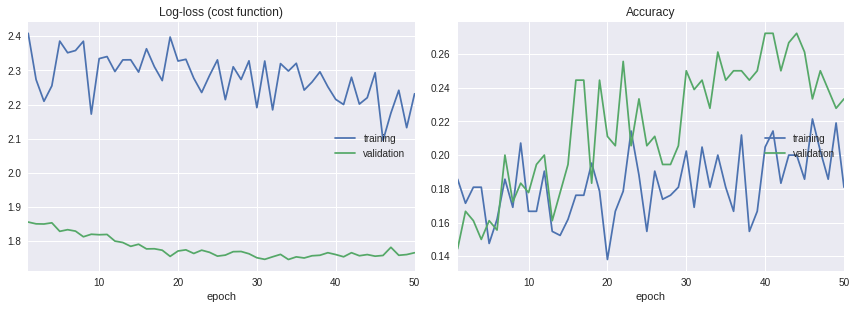

In [16]:
batch_size = 35
epochs = 50

trainingCNN = model.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = False, 
                    validation_data = [xTest,yTest],callbacks=[PlotLossesKeras()])

In [17]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = model.evaluate(xTest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])

Evaluating the test set...
180/180 [==============================] - 1s 6ms/step

Test score: 1.7661525461408827
Test accuracy: 0.2333333326710595



As evidenced in the previous graph, with 50 epoch and a batch size of 35, the best accuracy for validation that was obtained was 26% , this happens because the number of imganees that you have to train the network is very small compared to the training parameters. Chaging parameters like dropout rate or number or convolutions results perform slightly better.

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = model.predict(xTest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(np.argmax(yTest,axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(np.argmax(yTest,axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr    7    2   11    7    0    2
man    2   11   14    0    0    6
owl    1    1   16    6    0    9
puf    7    1   16    5    0    5
tou    8    6    8    0    1    4
wod    3    4   13    2    0    2
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       0.25      0.24      0.25        29
        man       0.44      0.33      0.38        33
        owl       0.21      0.48      0.29        33
        puf       0.25      0.15      0.19        34
        tou       1.00      0.04      0.07        27
        wod       0.07      0.08      0.08        24

avg / total       0.37      0.23      0.22       180



Derived from the confusion matrix we can detect that most of the observations are classified as 'owl' class. Above results come from the weigths initialization and first training batch. 

## Pretrained CNN - Xception

Xception was proposed by none other than François Chollet himself, the creator and chief maintainer of the Keras library. Xception is an extension of the Inception architecture which replaces the standard Inception modules with depthwise separable convolutions.  Xception's structure is as follows.



![Xception Structure](https://www.pyimagesearch.com/wp-content/uploads/2017/03/imagenet_xception_flow.png)


In [19]:
from keras.applications.xception import Xception
modelXception = Xception(weights='imagenet', include_top=True)

91889664/91884032 [==============================] - 3s 0us/step


In [20]:
# Predict probabilities for each sample in test.
import numpy as np
yPred1000P=modelXception.predict(xTest)

# Predict class for each sample in test.
yPred1000 = np.argmax(yPred1000P, axis=1)
yPred1000

array([722, 398, 659, 722, 659, 659, 659, 659, 659, 722, 659, 328, 722,
       659, 722, 772, 772, 520, 659, 659, 659, 659, 722, 659, 652, 722,
       722, 659, 722, 722, 680, 722, 659, 659, 652, 659, 812, 722, 398,
       659, 659, 722, 722, 659, 722, 659, 520, 772, 609, 328, 722, 659,
       722, 359, 722, 722, 659, 659, 659, 722, 772, 659, 722, 659, 659,
       659, 659, 659, 722, 722, 659, 722, 659, 659, 722, 652, 659, 680,
       722, 659, 659, 659, 722, 659, 659, 235, 679, 722, 659, 659, 722,
       659, 659, 722, 659, 722, 772, 722, 722, 328, 837, 659, 652, 659,
       722, 398, 722, 722, 722, 652, 679, 659, 659, 772, 659, 659, 722,
       659, 722, 722, 659, 659, 659, 783, 659, 722, 722, 659, 722, 722,
       722, 722, 659, 478, 781, 659, 659, 781, 772, 659, 722, 722, 722,
       659, 772, 659, 659, 679, 781, 659, 722, 520, 722, 722, 418, 659,
       659, 414, 722, 659, 659, 659, 398, 659, 722, 722, 659, 652, 659,
       659, 680, 659, 659, 659, 659, 722, 722, 722, 679, 659])

In [21]:
# Find the top 10 predicted classes in test set. 

import pandas as pd
unique, counts = np.unique(yPred1000, return_counts=True)

predFrequencies =pd.DataFrame( np.asarray((unique, counts)).T,columns=['Class','Count'])

sortDataFrame = predFrequencies.sort_values(by='Count',ascending=False)

topClasses=sortDataFrame.iloc[:10,:]

topClasses


,Class,Count
10,659,79
13,722,58
14,772,8
9,652,6
3,398,4
11,679,4
12,680,3
15,781,3
7,520,3
1,328,3


In [22]:
# Find the probabilities of being classify in top 10 classes for each image in test. 

testPredictorDataFrame = pd.DataFrame(yPred1000P)
topIndex=topClasses.as_matrix()[:,0]
finalPred = round(testPredictorDataFrame.iloc[:,topIndex],4)

finalPred

,659,722,772,652,398,679,680,781,520,328
0,0.0006,0.9993,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.9902,0.0000,0.0000,0.0000,0.0049,0.0000
2,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8304,0.1696,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9998,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.0174,0.6245,0.0000,0.0000,0.0527,0.0000,0.0000,0.0072,0.0000,0.0000


In [23]:
# Create confusion matrix(6 classes, 10 top classes)

target_names = ['egr','man','owl','puf','tou','wod']

confusionMatrix = pd.DataFrame(np.zeros(shape=(6,topIndex.shape[0])),columns=topIndex)
yTestL = np.argmax(yTest,axis=1)
for index, row in finalPred.iterrows():
    maxClass=finalPred.iloc[index,:].argmax()
    trueClass = yTestL[index]
    confusionMatrix.loc[trueClass,maxClass]= confusionMatrix.loc[trueClass,maxClass]+1
    a=0

confusionMatrix.reset_index(level=0, inplace=True)

def set_index(row):
  if row['index']==0: return target_names[0]
  elif   row['index']==1: return target_names[1]
  elif   row['index']==2: return target_names[2]
  elif   row['index']==3: return target_names[3]
  elif   row['index']==4: return target_names[4]
  else:  return target_names[5]
    
confusionMatrix=confusionMatrix.assign(index=confusionMatrix.apply(set_index,axis=1))
confusionMatrix.columns.values[0]='Class'
    
confusionMatrix



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  import sys


,Class,659,722,772,652,398,679,680,781,520,328
0,egr,14.0,7.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0
1,man,6.0,24.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,owl,22.0,3.0,4.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0
3,puf,21.0,8.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0
4,tou,9.0,9.0,0.0,4.0,0.0,2.0,1.0,1.0,1.0,0.0
5,wod,9.0,9.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0



**Discussion**

In the first stage of the analysis, a neural network was built with only two layers, the first with 34 neurons and the second with 64, these incorporated convolutions, maxpooling and dropout of 50%, however the results were not optimal, so that parameters such as activation functions, dropout levels and different optimizers were adjusted. Even so, I did not improve the performance of the neural network, so that more layers were added, without obtaining better results in the classification results, as it is observed in the accuracy that was 0.23 and the confusion and reporting matrix. classification. The final neural network reached more than 5 million parameters. 

As seen in the graph, although the network is learning at an increasing rate, its accuracy does not exceed 0.3 in trainning, as the number of images is low as indicated above.

In a second phase, XCEPTION was used as a pre-trained network, a deep convolutional neural network architecture inspired by Inception, with separable convolutions in depth, according to its authors, slightly exceeds Inception V3 in the ImageNet data set (for which Inception V3 was designed) and significantly exceeds Inception V3 in a larger image classification data set comprising 350 million images and 17,000 classes, achieving more efficient use of model parameters.

From the results of this pre-trained neural network the classifications of our train images were obtained within the IMAGINET database, choosing those with greater probability and from these the confusion matrix was constructed, in which each class of bird in the sample, it is classified in one of the 10 IMAGINET images with greater probability.


# Transfer Learning
We use the pre-trained CNN model as a feature extractor. The pretrained model was 'Xception'. We also replace the top part of the pretrained CNN with two layers of 256 and 6 neurons respectively.

## Xception Model

Xception was proposed by none other than François Chollet himself, the creator and chief maintainer of the Keras library. Xception is an extension of the Inception architecture which replaces the standard Inception modules with depthwise separable convolutions.  Xception's structure is as follows.

![Xception Structure](https://www.pyimagesearch.com/wp-content/uploads/2017/03/imagenet_xception_flow.png)


In [0]:
from keras import backend as K
K.clear_session()

In [0]:
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16

modelXceptionTF = Xception(weights='imagenet', include_top=False)

In [0]:
# Pre-process X.
newXtrain=modelXceptionTF.predict(xTrain)

# Pre-process X.
newXtest=modelXceptionTF.predict(xTest)

In [16]:
newXtrain.shape

(420, 10, 10, 2048)

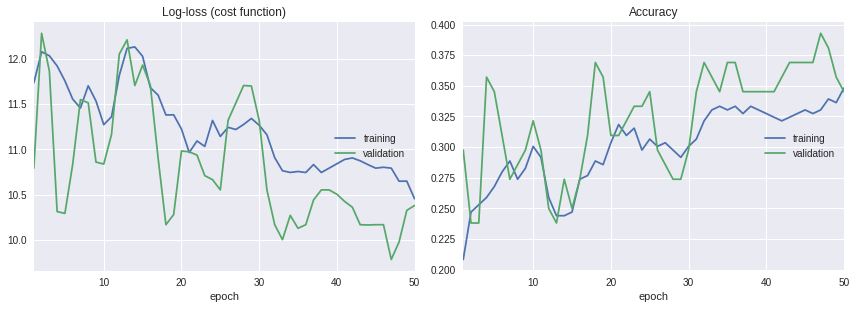

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras

# Model structure.
outputClasses = 6

# Create the model. 
cnn_transfer = Sequential()

# Apply a convolutional layer. 
cnn_transfer.add(Flatten(input_shape=newXtrain.shape[1:]))

# Add the fully connected.
cnn_transfer.add(Dense(256, activation='relu'))

# Add a dropout.
#cnn_transfer.add(Dropout(0.2))

# Add the fully connected.
cnn_transfer.add(Dense(outputClasses))

# Add the activation softmax.
cnn_transfer.add(Activation('softmax'))

print(cnn_transfer.summary(70))

# Compile the model. 
op=opts.Adam(lr=0.0001, epsilon=None, decay=0.0)
cnn_transfer.compile(loss = 'categorical_crossentropy',
              optimizer = op,
              metrics = ['accuracy'])

batch_size = 100
epochs = 50

trainingCNN_Transfer = cnn_transfer.fit(newXtrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split = 0.2,
                    callbacks=[PlotLossesKeras()])


In [20]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = cnn_transfer.evaluate(newXtest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])
Accu_Xception= score[1]
Accu_Xception

Evaluating the test set...
180/180 [==============================] - 0s 2ms/step

Test score: 12.625841395060222
Test accuracy: 0.21666666699780357


0.21666666699780357

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = cnn_transfer.predict(newXtest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr    0    0    0    1   17   11
man    0    0    0    0   12   21
owl    0    0    0    0   18   15
puf    0    0    0    1   13   20
tou    0    0    0    0   20    7
wod    0    0    0    0    6   18
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       0.00      0.00      0.00        29
        man       0.00      0.00      0.00        33
        owl       0.00      0.00      0.00        33
        puf       0.50      0.03      0.06        34
        tou       0.23      0.74      0.35        27
        wod       0.20      0.75      0.31        24

avg / total       0.16      0.22      0.10       180



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## VGG16 Model

The VGG network architecture was introduced by Simonyan and Zisserman in their 2014 paper, Very Deep Convolutional Networks for Large Scale Image Recognition. This network is characterized by its simplicity, using only 3×3 convolutional layers stacked on top of each other in increasing depth. Reducing volume size is handled by max pooling. Two fully-connected layers, each with 4,096 nodes are then followed by a softmax classifier (above).

![Xception Structure](https://www.pyimagesearch.com/wp-content/uploads/2017/03/imagenet_vgg16.png)


In [22]:
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16

modelXceptionTF = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
# Pre-process X.
newXtrain=modelXceptionTF.predict(xTrain)

# Pre-process X.
newXtest=modelXceptionTF.predict(xTest)

In [24]:
newXtrain.shape

(420, 9, 9, 512)

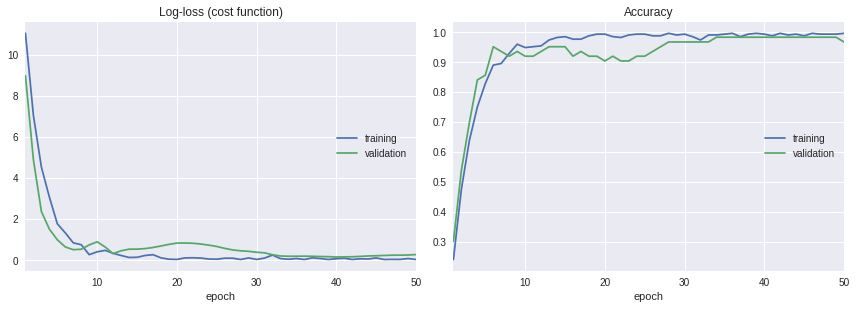

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras

# Model structure.
outputClasses = 6

# Create the model. 
cnn_transfer = Sequential()

# Apply a convolutional layer. 
cnn_transfer.add(Flatten(input_shape=newXtrain.shape[1:]))

# Add the fully connected.
cnn_transfer.add(Dense(256, activation='relu'))

# Add a dropout.
cnn_transfer.add(Dropout(0.6))

# Add the fully connected.
cnn_transfer.add(Dense(outputClasses))

# Add the activation softmax.
cnn_transfer.add(Activation('softmax'))

print(cnn_transfer.summary(70))

# Compile the model. 
op=opts.Adam(lr=0.0001,epsilon=None, decay=0.0)
cnn_transfer.compile(loss = 'categorical_crossentropy',
              optimizer = op,
              metrics = ['accuracy'])

batch_size = 150
epochs = 50

trainingCNN_Transfer = cnn_transfer.fit(newXtrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split = 0.15,
                    callbacks=[PlotLossesKeras()])


In [27]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = cnn_transfer.evaluate(newXtest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])

Accu_VGG16=score[1]
Accu_VGG16

Evaluating the test set...
180/180 [==============================] - 0s 547us/step

Test score: 0.5486489140621365
Test accuracy: 0.9388888888888889


0.9388888888888889

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = cnn_transfer.predict(newXtest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr   28    0    1    0    0    0
man    0   28    0    0    0    5
owl    0    0   33    0    0    0
puf    0    2    0   29    1    2
tou    0    0    0    0   27    0
wod    0    0    0    0    0   24
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       1.00      0.97      0.98        29
        man       0.93      0.85      0.89        33
        owl       0.97      1.00      0.99        33
        puf       1.00      0.85      0.92        34
        tou       0.96      1.00      0.98        27
        wod       0.77      1.00      0.87        24

avg / total       0.95      0.94      0.94       180



## ResNet50 Model

Unlike traditional sequential network architectures such as AlexNet, OverFeat, and VGG, ResNet is instead a form of “exotic architecture” that relies on micro-architecture modules (also called “network-in-network architectures”).

The term micro-architecture refers to the set of “building blocks” used to construct the network. A collection of micro-architecture building blocks (along with your standard CONV, POOL, etc. layers) leads to the macro-architecture (i.e,. the end network itself).

First introduced by He et al. in their 2015 paper, Deep Residual Learning for Image Recognition, the ResNet architecture has become a seminal work, demonstrating that extremely deep networks can be trained using standard SGD (and a reasonable initialization function) through the use of residual modules:

![Xception Structure](https://www.pyimagesearch.com/wp-content/uploads/2017/03/imagenet_resnet_residual.png)

Even though ResNet is much deeper than VGG16 and VGG19, the model size is actually substantially smaller due to the usage of global average pooling rather than fully-connected layers — this reduces the model size down to 102MB for ResNet50.

In [29]:
from keras.applications.resnet50 import ResNet50

modelXceptionTF = ResNet50(weights='imagenet', include_top=False)

94658560/94653016 [==============================] - 3s 0us/step


In [0]:
# Pre-process X.
newXtrain=modelXceptionTF.predict(xTrain)

# Pre-process X.
newXtest=modelXceptionTF.predict(xTest)

In [31]:
newXtrain.shape

(420, 1, 1, 2048)

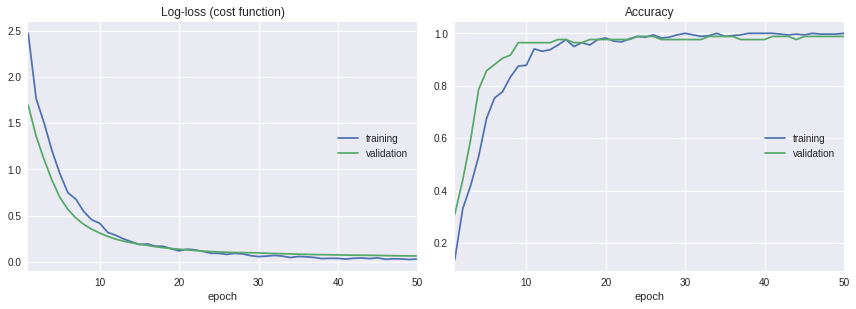

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras

# Model structure.
outputClasses = 6

# Create the model. 
cnn_transfer = Sequential()

# Apply a convolutional layer. 
cnn_transfer.add(Flatten(input_shape=newXtrain.shape[1:]))

# Add the fully connected.
cnn_transfer.add(Dense(256, activation='relu'))

# Add a dropout.
cnn_transfer.add(Dropout(0.5))

# Add the fully connected.
cnn_transfer.add(Dense(outputClasses))

# Add the activation softmax.
cnn_transfer.add(Activation('softmax'))

print(cnn_transfer.summary(70))

# Compile the model. 
op=opts.Adam(lr=0.0001, epsilon=None, decay=0.0)
cnn_transfer.compile(loss = 'categorical_crossentropy',
              optimizer = op,
              metrics = ['accuracy'])

batch_size = 100
epochs = 50

trainingCNN_Transfer = cnn_transfer.fit(newXtrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split = 0.2,
                    callbacks=[PlotLossesKeras()])

In [33]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = cnn_transfer.evaluate(newXtest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])
Accu_RestNet=score[1]
Accu_RestNet

Evaluating the test set...
180/180 [==============================] - 0s 222us/step

Test score: 0.08096052358547846
Test accuracy: 0.9722222222222222


0.9722222222222222

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = cnn_transfer.predict(newXtest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr   29    0    0    0    0    0
man    0   30    0    0    0    3
owl    0    0   33    0    0    0
puf    0    1    0   33    0    0
tou    0    0    0    0   26    1
wod    0    0    0    0    0   24
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       1.00      1.00      1.00        29
        man       0.97      0.91      0.94        33
        owl       1.00      1.00      1.00        33
        puf       1.00      0.97      0.99        34
        tou       1.00      0.96      0.98        27
        wod       0.86      1.00      0.92        24

avg / total       0.98      0.97      0.97       180



## InceptionV3 Model

The “Inception” micro-architecture was first introduced by Szegedy et al. in their 2014 paper, Going Deeper with Convolutions:

![Xception Structure](https://www.pyimagesearch.com/wp-content/uploads/2017/03/imagenet_inception_module.png)

The goal of the inception module is to act as a “multi-level feature extractor” by computing 1×1, 3×3, and 5×5 convolutions within the same module of the network — the output of these filters are then stacked along the channel dimension and before being fed into the next layer in the network.

The original incarnation of this architecture was called GoogLeNet, but subsequent manifestations have simply been called Inception vN where N refers to the version number put out by Google.

The Inception V3 architecture included in the Keras core comes from the later publication by Szegedy et al., Rethinking the Inception Architecture for Computer Vision (2015) which proposes updates to the inception module to further boost ImageNet classification accuracy.

The weights for Inception V3 are smaller than both VGG and ResNet, coming in at 96MB.

In [35]:
from keras.applications.inception_v3 import InceptionV3

modelXceptionTF = InceptionV3(weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 3s 0us/step


In [0]:
# Pre-process X.
newXtrain=modelXceptionTF.predict(xTrain)

# Pre-process X.
newXtest=modelXceptionTF.predict(xTest)

In [37]:
newXtrain.shape

(420, 8, 8, 2048)

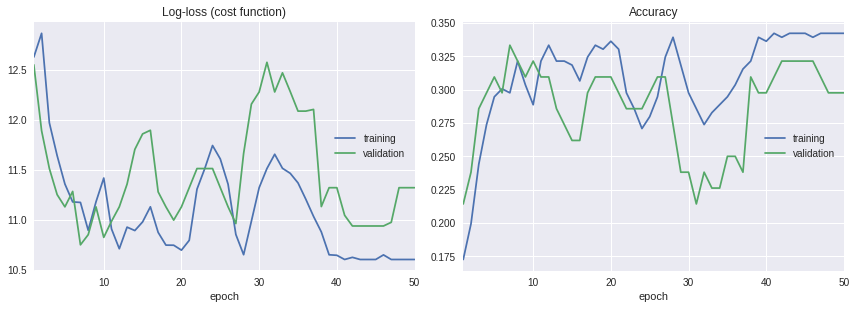

In [45]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras

# Model structure.
outputClasses = 6

# Create the model. 
cnn_transfer = Sequential()

# Apply a convolutional layer. 
cnn_transfer.add(Flatten(input_shape=newXtrain.shape[1:]))

# Add the fully connected.
cnn_transfer.add(Dense(256, activation='relu'))

# Add a dropout.
#cnn_transfer.add(Dropout(0.2))

# Add the fully connected.
cnn_transfer.add(Dense(outputClasses))

# Add the activation softmax.
cnn_transfer.add(Activation('softmax'))

print(cnn_transfer.summary(70))

# Compile the model. 
op=opts.adam(lr=0.0001, decay=0.0)
cnn_transfer.compile(loss = 'categorical_crossentropy',
              optimizer = op,
              metrics = ['accuracy'])

batch_size = 200
epochs = 50

trainingCNN_Transfer = cnn_transfer.fit(newXtrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split = 0.2,
                    callbacks=[PlotLossesKeras()])

In [46]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = cnn_transfer.evaluate(newXtest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])
Accu_InceptionV3=score[1]
Accu_InceptionV3

Evaluating the test set...
180/180 [==============================] - 0s 1ms/step

Test score: 11.819936667548285
Test accuracy: 0.26666666666666666


0.26666666666666666

In [47]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = cnn_transfer.predict(newXtest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr   26    0    0    0    0    3
man    9    0    0    0    0   24
owl   25    0    0    0    0    8
puf   25    0    0    0    0    9
tou   15    0    0    0    0   12
wod    2    0    0    0    0   22
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       0.25      0.90      0.40        29
        man       0.00      0.00      0.00        33
        owl       0.00      0.00      0.00        33
        puf       0.00      0.00      0.00        34
        tou       0.00      0.00      0.00        27
        wod       0.28      0.92      0.43        24

avg / total       0.08      0.27      0.12       180



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Comparing Transfer Learning Models

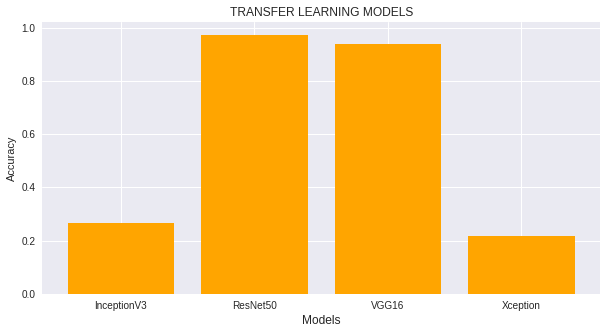

In [48]:
plt.figure(figsize=(10,5))
plt.bar(["Xception","VGG16","ResNet50","InceptionV3"],[Accu_Xception,Accu_VGG16,Accu_RestNet,Accu_InceptionV3],color="orange",align='center')
plt.title("TRANSFER LEARNING MODELS")
plt.xlabel("Models",fontsize=12)
plt.ylabel("Accuracy")
plt.show()


The best two pre-trained models to classify the six types of images are ResNet50 being the best with an accuracy of 0.97, followed by VGG16 with 0.938. The remaining 2 models do not allow to find the fundamental characteristics for birds.

RESNET50 is a pre-trained neural network of residual learning in which its authors explicitly reformulated layers as residual learning functions with reference to layer entries, instead of learning functions without reference. According to the references, these residual networks are easier to optimize and can obtain precision from a considerably greater depth.

Our network RESNET50 use two hidden layers that include a 50% dropout and a relu activation function and an optimized Adam, whose learning rate was adjusted (Tunning), as well as the other parameters of the network, in order to avoid Overfitting in learning and getting the best accuracy.

VGG corresponds to pre-trained networks that use convolutional network depth for the recognition of large-scale images, in this case with a depth of 16 weight layers. Their authors indicate that their representations are generalized well to other data sets, where they achieve cutting-edge results.

Finally we set the same architecture in VGG16 model and perfom a parameter tuning. For instance we modify Dropout and learning rate in order to get similar results to other models(i.e. RESNET50 )

---

# Fine Tuning 

We use the pre-trained CNN model as a feature extractor. The pretrained model was 'Xception'. We also replace the top part of the pretrained CNN with two layers of 256 and 6 neurons respectively. Weigths in Xception are also trained.

In [0]:
K.clear_session()

## Xception Model

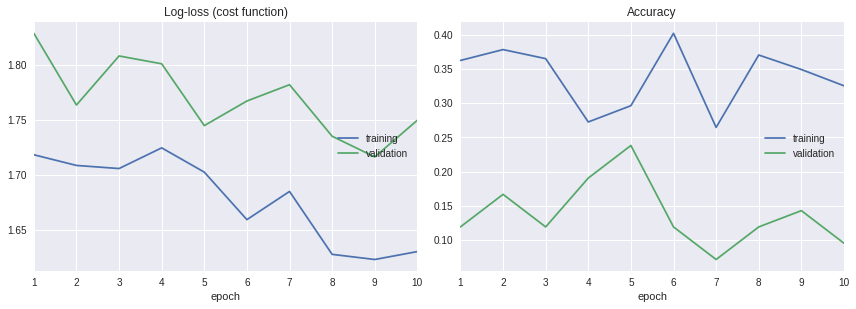

In [49]:
from keras.applications.xception import Xception
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras

# Model structure.
outputClasses = 6

# Load pretrained model..
modelXception = Xception(weights='imagenet', include_top=False, input_shape=(xsize,ysize,3))
#modelXception = VGG16(weights='imagenet', include_top=False, input_shape=(xsize,ysize,3))

# Create the model. 
modelFineTuning = Sequential()

# Add pretrained model. 
modelFineTuning.add(modelXception)

# Apply a convolutional layer. 
modelFineTuning.add(Flatten())

# Add the fully connected.
modelFineTuning.add(Dense(256, activation='softmax'))

# Add a dropout.
modelFineTuning.add(Dropout(0.2))

# Add the fully connected.
modelFineTuning.add(Dense(outputClasses))

# Add the activation softmax.
modelFineTuning.add(Activation('softmax'))

modelFineTuning.summary(70)

# Compile the model. 
op=opts.adam(lr=0.001, decay=0.0)
#op=opts.RMSprop()
modelFineTuning.compile(loss = 'categorical_crossentropy',
              optimizer = op,
              metrics = ['accuracy'])

batch_size = 10
epochs = 10
# Train Model.
trainingCNN_FineTuning = modelFineTuning.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split =0.1,callbacks=[PlotLossesKeras()])



In [50]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = modelFineTuning.evaluate(xTest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])
Accur_Xception=score[1]
Accur_Xception

Evaluating the test set...
180/180 [==============================] - 5s 27ms/step

Test score: 1.796935420566135
Test accuracy: 0.2166666673289405


0.2166666673289405

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = modelFineTuning.predict(xTest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr    7    0   22    0    0    0
man    2    2   29    0    0    0
owl    1    2   30    0    0    0
puf   12    7   15    0    0    0
tou    2    4   21    0    0    0
wod    0    1   23    0    0    0
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       0.29      0.24      0.26        29
        man       0.12      0.06      0.08        33
        owl       0.21      0.91      0.35        33
        puf       0.00      0.00      0.00        34
        tou       0.00      0.00      0.00        27
        wod       0.00      0.00      0.00        24

avg / total       0.11      0.22      0.12       180



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## VGG16 Model

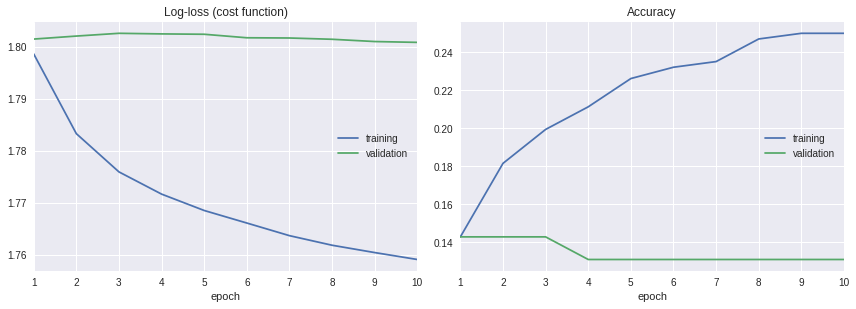

In [54]:
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras

# Model structure.
outputClasses = 6

# Load pretrained model..
modelXception = VGG16(weights='imagenet', include_top=False, input_shape=(xsize,ysize,3))

# Create the model. 
modelFineTuning = Sequential()

# Add pretrained model. 
modelFineTuning.add(modelXception)

# Apply a convolutional layer. 
modelFineTuning.add(Flatten())

# Add the fully connected.
modelFineTuning.add(Dense(256, activation='softmax'))

# Add a dropout.
#modelFineTuning.add(Dropout(0.5))

# Add the fully connected.
modelFineTuning.add(Dense(outputClasses))

# Add the activation softmax.
modelFineTuning.add(Activation('softmax'))

modelFineTuning.summary(70)

# Compile the model. 
op=opts.SGD(lr=0.0001, decay=0.0)
#op=opts.RMSprop()
modelFineTuning.compile(loss = 'categorical_crossentropy',
              optimizer = op,
              metrics = ['accuracy'])

batch_size = 10
epochs = 10

# Train Model.
trainingCNN_FineTuning = modelFineTuning.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split =0.2,callbacks=[PlotLossesKeras()])


In [55]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = modelFineTuning.evaluate(xTest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])
Accur_VGG16=score[1]
Accur_VGG16

Evaluating the test set...
180/180 [==============================] - 4s 22ms/step

Test score: 1.7925145069758097
Test accuracy: 0.19444444477558137


0.19444444477558137

In [56]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = modelFineTuning.predict(xTest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr    7    2    8    3    4    5
man    5    7    5    1   12    3
owl    8    4    7    4    4    6
puf    6    9    5    3    7    4
tou    4    8    3    5    3    4
wod    3    4    5    3    1    8
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       0.21      0.24      0.23        29
        man       0.21      0.21      0.21        33
        owl       0.21      0.21      0.21        33
        puf       0.16      0.09      0.11        34
        tou       0.10      0.11      0.10        27
        wod       0.27      0.33      0.30        24

avg / total       0.19      0.19      0.19       180



## ResNet50 Model

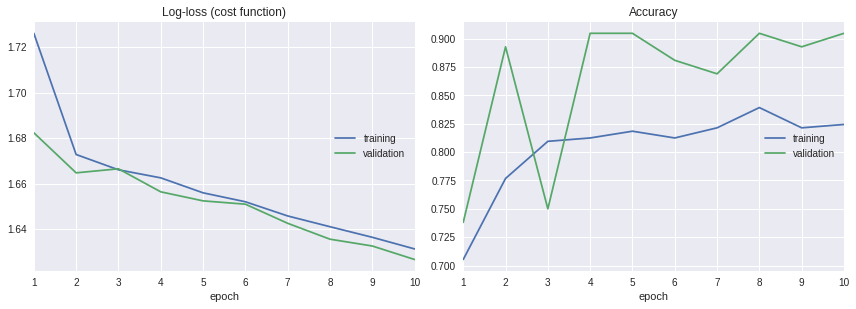

In [58]:
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras

# Model structure.
outputClasses = 6

# Load pretrained model..
modelXception = ResNet50(weights='imagenet', include_top=False, input_shape=(xsize,ysize,3))

# Create the model. 
modelFineTuning = Sequential()

# Add pretrained model. 
modelFineTuning.add(modelXception)

# Apply a convolutional layer. 
modelFineTuning.add(Flatten())

# Add the fully connected.
modelFineTuning.add(Dense(256, activation='softmax'))

# Add a dropout.
#modelFineTuning.add(Dropout(0.5))

# Add the fully connected.
modelFineTuning.add(Dense(outputClasses))

# Add the activation softmax.
modelFineTuning.add(Activation('softmax'))

modelFineTuning.summary(70)

# Compile the model. 
op=opts.adam(lr=0.0001, decay=0.0)
#op=opts.RMSprop()
modelFineTuning.compile(loss = 'categorical_crossentropy',
              optimizer = op,
              metrics = ['accuracy'])

batch_size = 10
epochs = 10

# Train Model.
trainingCNN_FineTuning = modelFineTuning.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split =0.2,callbacks=[PlotLossesKeras()])

In [59]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = modelFineTuning.evaluate(xTest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])
Accur_ResNet=score[1]
Accur_ResNet

Evaluating the test set...
180/180 [==============================] - 4s 22ms/step

Test score: 1.6315908617443509
Test accuracy: 0.8055555568801032


0.8055555568801032

In [61]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = modelFineTuning.predict(xTest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr   29    0    0    0    0    0
man    1    0    0   32    0    0
owl    0    0   33    0    0    0
puf    1    0    0   33    0    0
tou    0    0    0    1   26    0
wod    0    0    0    0    0   24
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       0.94      1.00      0.97        29
        man       0.00      0.00      0.00        33
        owl       1.00      1.00      1.00        33
        puf       0.50      0.97      0.66        34
        tou       1.00      0.96      0.98        27
        wod       1.00      1.00      1.00        24

avg / total       0.71      0.81      0.74       180



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## InceptionV3 Model

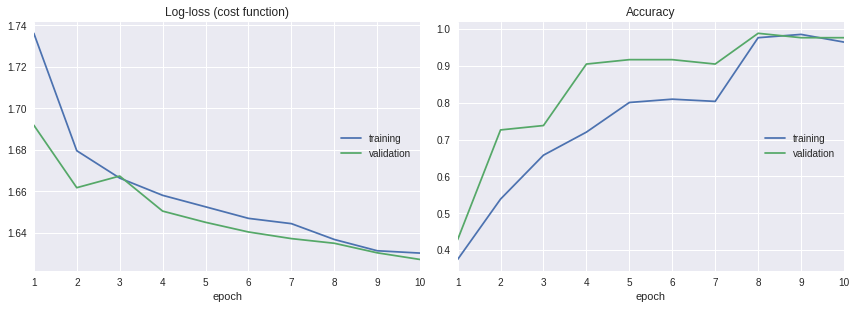

In [12]:
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras.optimizers as opts
from livelossplot import PlotLossesKeras

# Model structure.
outputClasses = 6

# Load pretrained model..
modelXception = InceptionV3(weights='imagenet', include_top=False, input_shape=(xsize,ysize,3))

# Create the model. 
modelFineTuning = Sequential()

# Add pretrained model. 
modelFineTuning.add(modelXception)

# Apply a convolutional layer. 
modelFineTuning.add(Flatten())

# Add the fully connected.
modelFineTuning.add(Dense(256, activation='softmax'))

# Add a dropout.
#modelFineTuning.add(Dropout(0.5))

# Add the fully connected.
modelFineTuning.add(Dense(outputClasses))

# Add the activation softmax.
modelFineTuning.add(Activation('softmax'))

modelFineTuning.summary(70)

# Compile the model. 
op=opts.adam(lr=0.0001, decay=0.0)
#op=opts.RMSprop()
modelFineTuning.compile(loss = 'categorical_crossentropy',
              optimizer = op,
              metrics = ['accuracy'])

batch_size = 10

epochs = 10

# Train Model.
trainingCNN_FineTuning = modelFineTuning.fit(xTrain, yTrain,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle = True, 
                    validation_split =0.2,callbacks=[PlotLossesKeras()])

In [13]:
# Perform the neural network over the test set. 
print('Evaluating the test set...')
score = modelFineTuning.evaluate(xTest, yTest)

print('\nTest score:', score[0])
print('Test accuracy:', score[1])
Accur_InceptionV3=score[1]
Accur_InceptionV3

Evaluating the test set...
180/180 [==============================] - 5s 30ms/step

Test score: 1.6242307239108615
Test accuracy: 0.983333330684238


0.983333330684238

In [15]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
import numpy as np

# Set the classes' names.
target_names = ['egr','man','owl','puf','tou','wod']

# Predict class in test.
Y_pred = modelFineTuning.predict(xTest)

# Choose the class with higher probability.
y_pred = np.argmax(Y_pred, axis=1)

print('-------------------------------------------------')
print('-------------------------------------------------')
print('-----------------Confusion Matrix----------------')
print(pd.DataFrame(confusion_matrix(yTest.argmax(axis=1), y_pred),columns=target_names, index=target_names))
print('-------------------------------------------------')
print('-------------------------------------------------\n')
print('---------------Classification Report-------------')

print(classification_report(yTest.argmax(axis=1), y_pred, target_names=target_names))

-------------------------------------------------
-------------------------------------------------
-----------------Confusion Matrix----------------
     egr  man  owl  puf  tou  wod
egr   28    0    1    0    0    0
man    0   32    0    1    0    0
owl    0    0   33    0    0    0
puf    0    0    0   34    0    0
tou    0    0    0    1   26    0
wod    0    0    0    0    0   24
-------------------------------------------------
-------------------------------------------------

---------------Classification Report-------------
             precision    recall  f1-score   support

        egr       1.00      0.97      0.98        29
        man       1.00      0.97      0.98        33
        owl       0.97      1.00      0.99        33
        puf       0.94      1.00      0.97        34
        tou       1.00      0.96      0.98        27
        wod       1.00      1.00      1.00        24

avg / total       0.98      0.98      0.98       180



## Comparing Fine Tuning Models

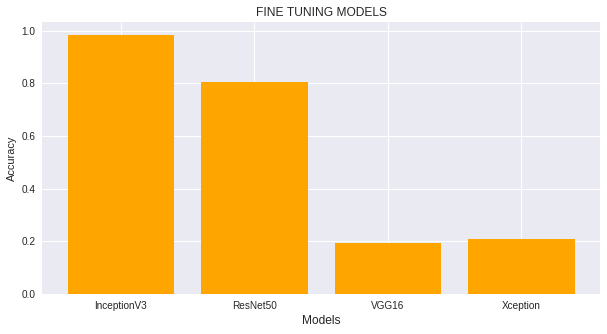

In [17]:
plt.figure(figsize=(10,5))
plt.bar(["Xception","VGG16","ResNet50","InceptionV3"],[0.21,0.1944,0.8055,Accur_InceptionV3],color="orange",align='center')
plt.title("FINE TUNING MODELS")
plt.xlabel("Models",fontsize=12)
plt.ylabel("Accuracy")
plt.show()

we can see that in fine tuning, accuracy above 0.90 for InceptionV3 was sewn, which allows concluding that both transfer learning and Fine tuning have similar results in this project, in addition the performance of the pre-trained network ResNet50 is highlighted in both methods He had better performance. Differences between Transfer learning and Fine Tuning results are consecuence of the highly dimensional parameters dimension that we are traning in Fine Tuning. Moreover if we take into account the limited size of database we conclude fine tuning is not the best way to approach to this problem.

In [18]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3618519897196186857, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 187891712
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3618103794504563862
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

## Conclusions


Since the use of pre-trained neural networks, a classification exercise was carried out, after preprocessing the database of 600 observations of 6 different kinds of birds. Different pre-trained networks were used, seeking the best performance in the classification, with the best RESNET50 and VGG16. For the different networks used, several architectures were experimented and their parameters were adjusted (tunning) such as activation functions, optimizers and others.

Although the best results were obtained in the use of pre-trained networks in Transfer Learning, the results did not improve traning the weights of those pretrained models. As a result a better performance was not obtained when applying them in Fine Tunning. The explanation is that for our dataset the best practice is use transfer learning due to database size. Then it is more convenient in the present exercise that the network inputs are obtained at from pre-trained networks and not in the application of these to all layers.

## Bibliography

1) Pre-trained Deep Learning Models applications chttps://keras.io/applications/

2) Pre-trained Deep Learning Models Repository https://github.com/fchollet/deep-learning-models/

3) Pre-trained Deep Learning Models references https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/

4)  Very Deep Convolutional Networks for Large-Scale Image Recognition. https://arxiv.org/abs/1409.1556.

5)  Deep Residual Learning for Image Recognition. https://arxiv.org/abs/1512.03385

6) Rethinking the Inception Architecture for Computer Vision. https://arxiv.org/abs/1512.00567

7) Svetlana Lazebnik, Cordelia Schmid, and Jean Ponce. A Maximum Entropy Framework for Part-Based Texture and Object Recognition. Proceedings of the IEEE International Conference on Computer Vision, Beijing, China, October 2005, vol. 1, pp. 832-838. (Birds Database . http://www-cvr.ai.uiuc.edu/ponce_grp/data/)

8) Deep Learning with TensorFlow: Explore neural networks with Python, by Giancarlo Zaccone , Md. Rezaul Karim, Ahmed Menshawy. (2017).

9) Deep Learning with Keras: Implementing deep learning models and neural networks with the power of by Python,Antonio Gulli, Sujit Pal.(2017).